# 

# 7

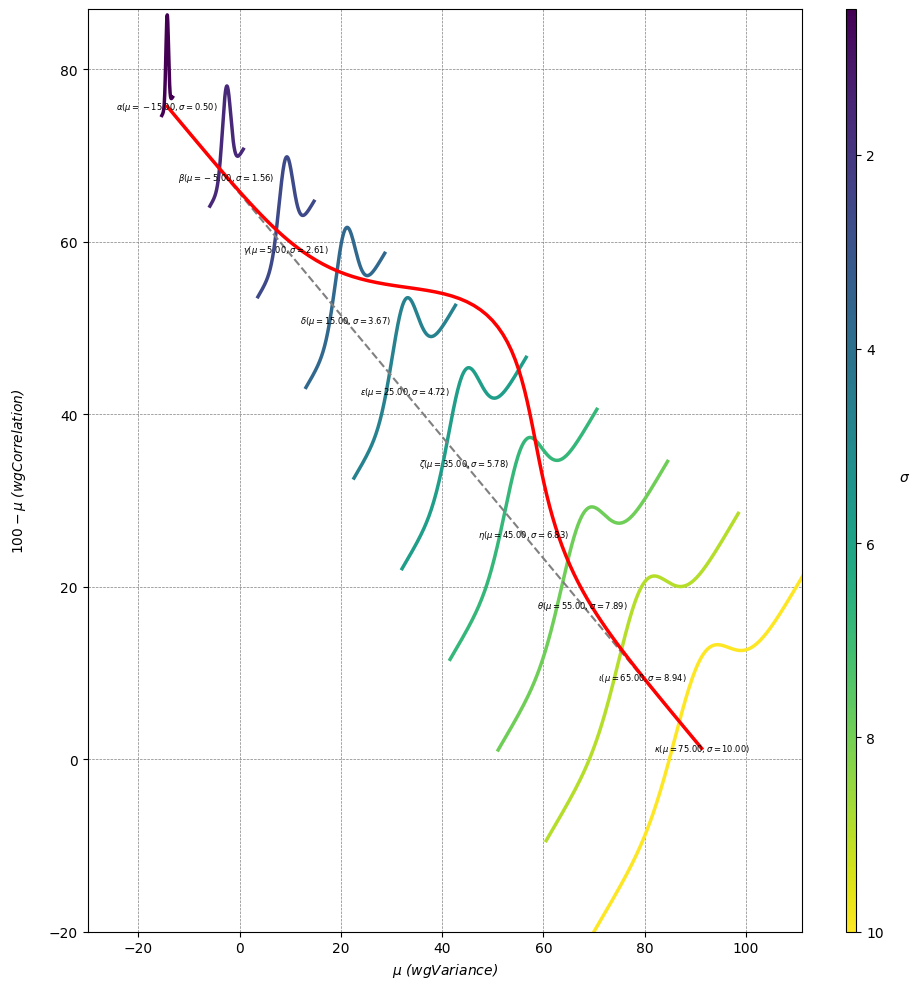

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

# Define Gaussian Function
def gaussian(x, mean, std_dev, amplitude=1):
    return amplitude * np.exp(-0.9 * ((x - mean) / std_dev) ** 2)

# Function to overlay Gaussian on the diagonal based on start and end points
def overlay_gaussian_on_line(ax, start, end, std_dev):
    x_line = np.linspace(start[0], end[0], 100)
    y_line = np.linspace(start[1], end[1], 100)
    mean = np.mean(x_line)
    
    y = gaussian(x_line, mean, std_dev, amplitude=std_dev)
    ax.plot(x_line + y / np.sqrt(2), y_line + y / np.sqrt(2), color='red', linewidth=2.5)

# Create the plot and axis object
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figsize to better suit your needs


# Create custom Gaussians
intervals = np.linspace(0, 100, 11)
custom_means = np.linspace(1, 23, 10)
custom_stds = np.linspace(.5, 10, 10)
greek_letters = ['α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ']

# Setup colormap
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(custom_stds.min(), custom_stds.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create an empty list to hold median points
median_points = []

# Plot custom Gaussians
for i in range(10):
    xi, xf = intervals[i], intervals[i+1]
    x_center, y_center = (xi + xf) / 2 - 20, 100 - (xi + xf) / 2 - 20
    # Limit Gaussian curve to +/- 3 standard deviations
    x_curve = np.linspace(custom_means[i] - 3 * custom_stds[i], custom_means[i] + 3 * custom_stds[i], 200)
    y_curve = gaussian(x_curve, custom_means[i], custom_stds[i], amplitude=15)
    
    x_gauss = x_center + x_curve / np.sqrt(2)
    y_gauss = y_center + y_curve / np.sqrt(2) + x_curve / np.sqrt(2)
    
    ax.plot(x_gauss, y_gauss, color=cmap(norm(custom_stds[i])), linewidth=2.5)
    actual_mean = x_center  # Calculating the actual mean point for the label
    ax.text(x_center + custom_means[i] / np.sqrt(2), 
            y_center + custom_means[i] / np.sqrt(2), 
            f"${greek_letters[i]} (\mu={actual_mean:.2f}, \sigma={custom_stds[i]:.2f})$", 
            fontsize=6, ha='center', va='center')
    
    # Add the median point to our list
    median_points.append((x_center + custom_means[i] / np.sqrt(2), y_center + custom_means[i] / np.sqrt(2)))

# Convert the list to a numpy array for plotting
median_points = np.array(median_points)

# Plot the dashed gray line through medians
ax.plot(median_points[:, 0], median_points[:, 1], '--', color='grey')

# Find the start and end points of the dashed gray line
start_point = median_points[0, :]
end_point = median_points[-1, :]

# Overlay red Gaussian along the dashed gray line
overlay_gaussian_on_line(ax, start_point, end_point, 17)

# Grid and Legend
ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Manually setting the axes limits (if needed)
ax.set_xlim(-30, 111)
ax.set_ylim(-20, 87)

# Create reversed colormap for colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=1, aspect=90)  # Adjust `shrink` and `aspect` here
cbar.set_label(r'$\sigma$', rotation=0, labelpad=15, fontstyle='italic')
cbar.ax.invert_yaxis()


# Add x and y axis titles
ax.set_xlabel(r'$\mu$ (wgVariance)', fontstyle='italic')
ax.set_ylabel(r'$100-\mu$ (wgCorrelation)', rotation=90, fontstyle='italic', labelpad=15) # rotation

# Make the layout tight
plt.tight_layout()
plt.show()



> *A recent study from researchers at Stanford, the University of California in Los Angeles and the Australian National University suggests the population living in the “wildland-urban interface”, where nature meets development, doubled between 1990 and 2010, to nearly 21m people. --[The Economist](https://www.economist.com/united-states/2023/09/21/parts-of-america-are-becoming-uninsurable#)*

+ nature (dionysian/red gaussian curve)
+ development (apollonian: the 10 smaller curves)
+ life (tension between these cosmic & social forces)

![](https://www.economist.com/cdn-cgi/image/width=600,quality=80,format=auto/content-assets/images/20230923_USM940.png)















































<Details>
<Summary></Summary>

Announcing Google Cloud Next ’24<br>
April 9-11, 2024<br>
<span style="color:grey;">Mandalay Bay, Convention Center, Las Vegas, NV</span><br>
</Details>